In [4]:
#ai.ja.zipをインストールし、解凍する
# !wget https://nlp100.github.io/data/ai.ja.zip
# !unzip ai.ja.zip

--2023-05-26 12:09:43--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.111.153, 185.199.108.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip’

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s    in 0.001s  

2023-05-26 12:09:44 (16.1 MB/s) - ‘ai.ja.zip’ saved [17516/17516]

Archive:  ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         


In [1]:
#係り受け解析結果をai.ja.txt.parsedに保存
!cabocha -f1 -o ai.ja.txt.parsed ai.ja.txt

In [1]:
# 40 係り受け解析結果の読み込み（形態素）
class Morph:
  def __init__(self, line):
    surface, other = line.split("\t")
    other = other.split(",")
    self.surface = surface
    self.base = other[-3]
    self.pos = other[0]
    self.pos1 = other[1]

sentences = [] #文リスト
morphs = [] #形態素リスト

for line in open("./ai.ja.txt.parsed"):
  if line[0] == "*":
    continue
  elif line != "EOS\n": 
    morphs.append(Morph(line))
  else:  #EOS（文末）の場合
    sentences.append(morphs)
    morphs = []

for i in sentences[0]:
    print(vars(i))

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}


In [28]:
# 41 係り受け解析結果の読み込み（文節・係り受け）
'''
* 7 8D 1/1 1.048596
  係り先文節インデックス番号(dst):8   係り元文節インデックス番号(srcs):[]
* 8 9D 0/3 1.540775
  係り先文節インデックス番号(dst):9   係り元文節インデックス番号(srcs):[7]
* 9 10D 0/1 2.129047
  係り先文節インデックス番号(dst):10  係り元文節インデックス番号(srcs):[8]
'''

# Morph: 形態素
class Morph:
  def __init__(self, line):
    surface, other = line.split("\t")
    other = other.split(",")
    self.surface = surface
    self.base = other[-3]
    self.pos = other[0]
    self.pos1 = other[1]

# Chunk: 文節
class Chunk:
  def __init__(self, morphs, dst):
    self.morphs = morphs # 形態素（Morphオブジェクト）のリスト
    self.dst = dst # 係り先文節インデックス番号 
    self.srcs = [] # 係り元文節インデックス番号

# Sentence: 文
class Sentence:
  def __init__(self, chunks):
    self.chunks = chunks
    for i, chunk in enumerate(self.chunks):
      if chunk.dst not in [None, -1]:
        self.chunks[chunk.dst].srcs.append(i)   

sentences = [] #文リスト
chunks = [] #節リスト
morphs = [] #形態素リスト

for line in open("./ai.ja.txt.parsed"):
    if line[0] == "*":   # e.g. * 0 -1D 1/1 0.000000
      if morphs:
        chunks.append(Chunk(morphs, dst))
        morphs = []
      dst = int(line.split()[2].replace("D", "")) # 係り先文節インデックス番号 
    elif line != "EOS\n":  #文頭　文中
      morphs.append(Morph(line))
    else: #EOS（文末）の場合
      chunks.append(Chunk(morphs, dst))
      sentences.append(Sentence(chunks))
      morphs = []
      chunks = []
      dst = None

for chunk in sentences[2].chunks:
  chunk_str = "".join([morph.surface for morph in chunk.morphs])
  print(f"文節の文字列：{chunk_str}\n係り先の文節番号：{chunk.dst}\n")

文節の文字列：人工知能
係り先の文節番号：17

文節の文字列：（じんこうちのう、、
係り先の文節番号：17

文節の文字列：AI
係り先の文節番号：3

文節の文字列：〈エーアイ〉）とは、
係り先の文節番号：17

文節の文字列：「『計算
係り先の文節番号：5

文節の文字列：（）』という
係り先の文節番号：9

文節の文字列：概念と
係り先の文節番号：9

文節の文字列：『コンピュータ
係り先の文節番号：8

文節の文字列：（）』という
係り先の文節番号：9

文節の文字列：道具を
係り先の文節番号：10

文節の文字列：用いて
係り先の文節番号：12

文節の文字列：『知能』を
係り先の文節番号：12

文節の文字列：研究する
係り先の文節番号：13

文節の文字列：計算機科学
係り先の文節番号：14

文節の文字列：（）の
係り先の文節番号：15

文節の文字列：一分野」を
係り先の文節番号：16

文節の文字列：指す
係り先の文節番号：17

文節の文字列：語。
係り先の文節番号：34

文節の文字列：「言語の
係り先の文節番号：20

文節の文字列：理解や
係り先の文節番号：20

文節の文字列：推論、
係り先の文節番号：21

文節の文字列：問題解決などの
係り先の文節番号：22

文節の文字列：知的行動を
係り先の文節番号：24

文節の文字列：人間に
係り先の文節番号：24

文節の文字列：代わって
係り先の文節番号：26

文節の文字列：コンピューターに
係り先の文節番号：26

文節の文字列：行わせる
係り先の文節番号：27

文節の文字列：技術」、または、
係り先の文節番号：34

文節の文字列：「計算機
係り先の文節番号：29

文節の文字列：（コンピュータ）による
係り先の文節番号：31

文節の文字列：知的な
係り先の文節番号：31

文節の文字列：情報処理システムの
係り先の文節番号：33

文節の文字列：設計や
係り先の文節番号：33

文節の文字列：実現に関する
係り先の文節番号：34

文節の文字列：研究分野」とも
係り先の文節番号：35

文節の文字列：される。
係り先の文節番号：-1



In [30]:
# 42 係り元と係り先の文節の表示
for chunk in sentences[2].chunks:
  if int(chunk.dst) == -1:
    continue
  else:
    dependent = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
    head = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"]) 
    print(f"{dependent}\t{head}")

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


In [10]:
# 43 名詞を含む文節が動詞を含む文節に係るものを抽出
for chunk in sentences[2].chunks:
  if int(chunk.dst) == -1:
    continue
  else:
    dependent = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
    head = "".join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"]) 
    pos_noun = [morph.surface for morph in chunk.morphs if morph.pos == "名詞"]
    pos_verb = [morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos == "動詞"]
    if pos_noun and pos_verb: 
      print(f"{dependent}\t{head}")

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



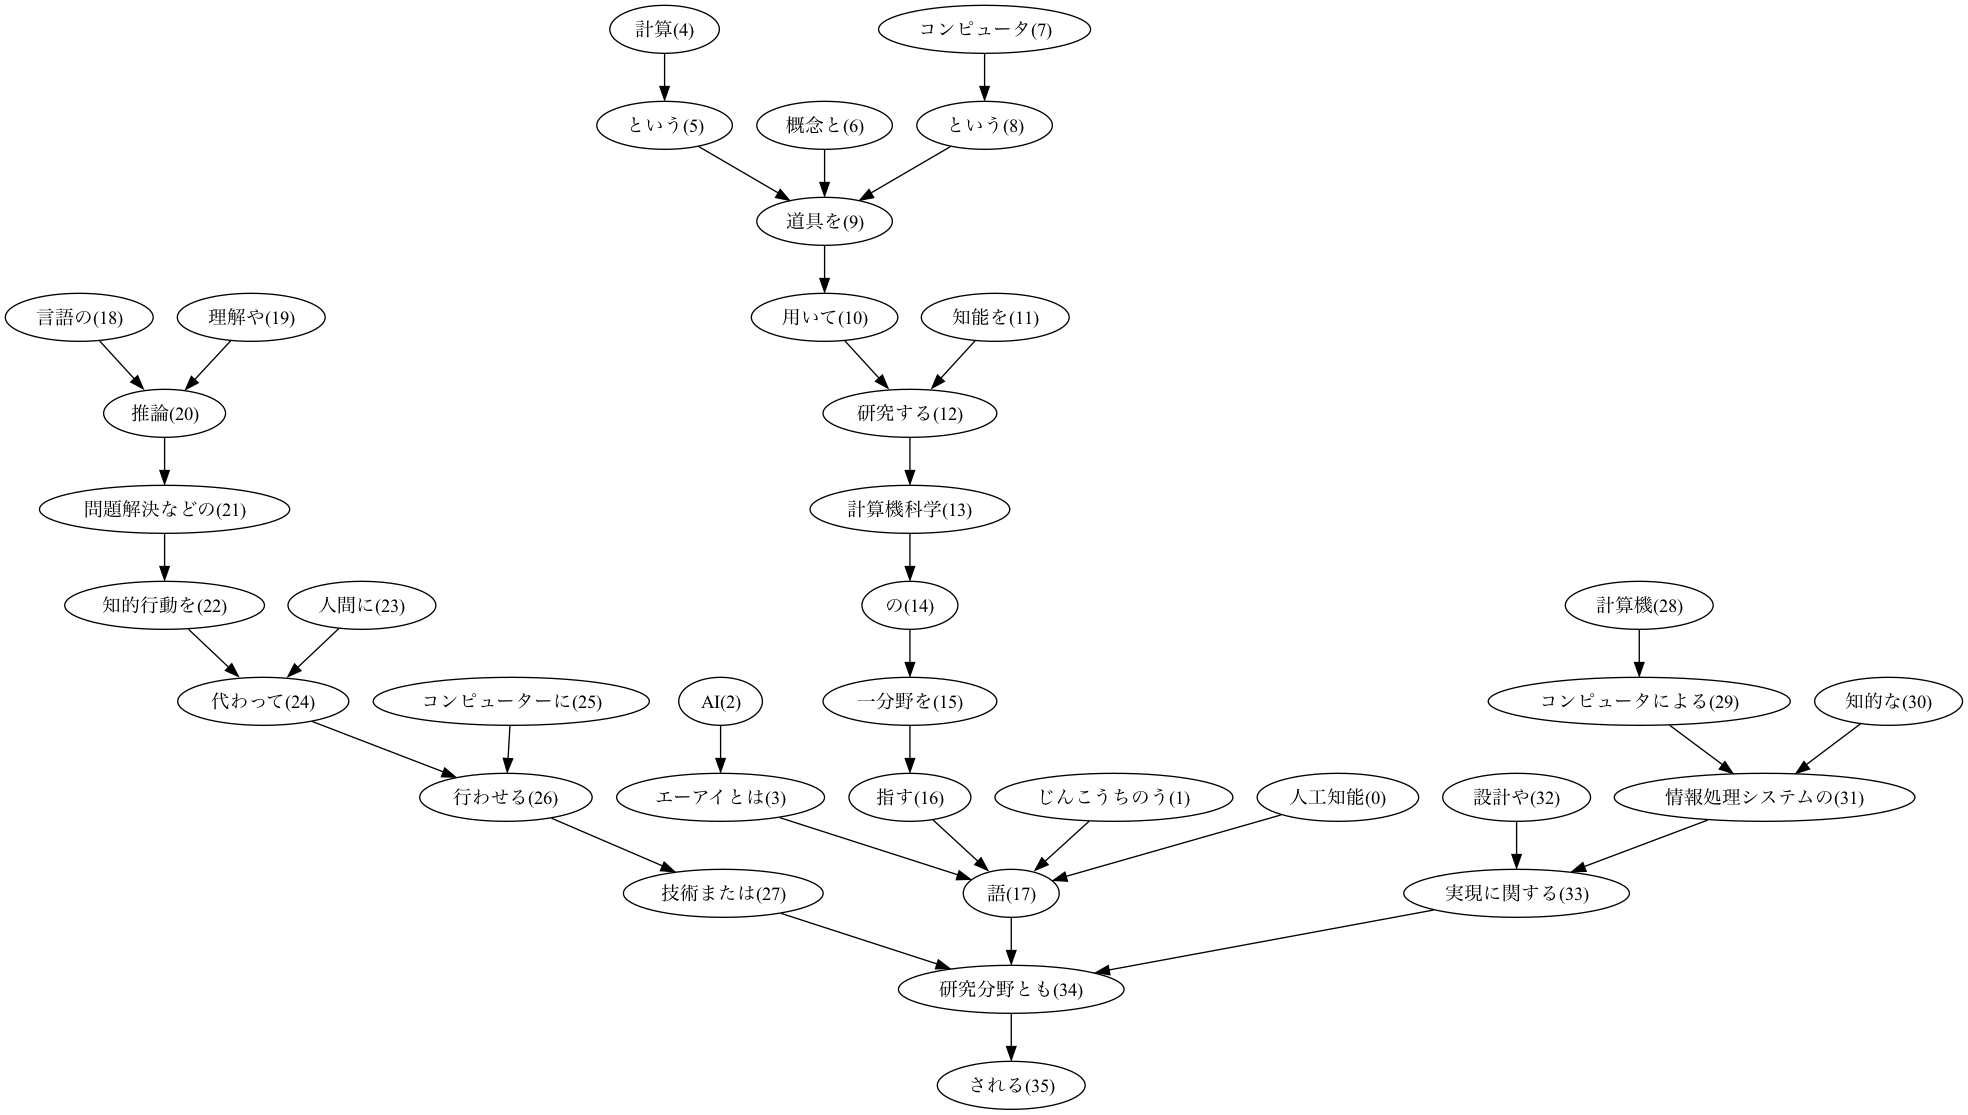

In [12]:
# 44 係り受け木の可視化
# 日本語表示用フォントのインストール
!apt install fonts-ipafont-gothic
import pydot
from IPython.display import Image,display_png
 
edges = []
for id, chunk in enumerate(sentences[2].chunks):
  if int(chunk.dst) == -1:
    continue
  else:
    dependent = ''.join([morph.surface for morph in chunk.morphs if morph.pos != "記号"] + ['(' + str(id) + ')'])
    head = ''.join([morph.surface for morph in sentences[2].chunks[int(chunk.dst)].morphs if morph.pos != "記号"] + ['(' + str(chunk.dst) + ')'])
    edges.append([dependent, head])
n = pydot.Node('node')
n.fontname = 'IPAGothic'
g = pydot.graph_from_edges(edges, directed=True)
g.add_node(n)
g.write_png('./answer44.png')
display_png(Image('./answer44.png'))

In [22]:
# 45 動詞の格パターンの抽出
# 最左の動詞の基本形(述語)tab 動詞に係っている文節の助詞(格)
with open("./result45.txt", "w") as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == "動詞": 
          particles = []
          for src in chunk.srcs:
            particles += [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == "助詞"]
          if len(particles) > 0:
            particles = set(particles)
            particles = sorted(list(particles))
            form = " ".join(particles)
            print(f"{morph.base}\t{form}", file=f)
          break

In [27]:
# コーパス中で頻出する述語と格パターンの組み合わせ
!cat ./result45.txt | sort | uniq -c | sort -nr | head -n 10
print("=======================================================")
# 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）
!cat ./result45.txt | grep '行う' | sort | uniq -c | sort -nr | head -n 5
print("=======================================================")
!cat ./result45.txt | grep 'なる' | sort | uniq -c | sort -nr | head -n 5
print("=======================================================")
!cat ./result45.txt | grep '与える' | sort | uniq -c | sort -nr | head -n 5


  49 する	を
  19 する	が
  15 する	に
  15 する	と
  12 する	は を
  10 する	に を
   9 よる	に
   9 する	で を
   8 行う	を
   8 する	が に
   8 行う	を
   1 行う	まで を
   1 行う	は を をめぐって
   1 行う	は を
   1 行う	に を
   3 なる	に は
   3 なる	が と
   2 なる	に
   2 なる	と
   1 異なる	も
   1 与える	に は を
   1 与える	が に
   1 与える	が など に


In [11]:
# 46 動詞の格フレーム情報の抽出
with open('./result46.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':  # chunkの左から順番に動詞を探す
          particles = []
          particle_term_chunks = []
          for src in chunk.srcs:  # 見つけた動詞の係り元chunkから助詞を探す
            particle = [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞']
            if len(particle) > 0:  # 助詞を含むchunkの場合は助詞と項を取得
              particles.append(" ".join(particle))
              particle_term_chunks.append(''.join(morph.surface for morph in sentence.chunks[src].morphs if morph.pos != '記号'))         
          line = '{}\t{}\t{}'.format(morph.base, ' '.join(particles), ' '.join(particle_term_chunks))
          print(line, file=f)
          break

In [26]:
# 47 機能動詞構文のマイニング
with open('./answer47.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':  # chunkの左から順番に動詞を探す
          for i, src in enumerate(chunk.srcs):  # 見つけた動詞の係り元chunkが「サ変接続名詞+を」で構成されるか確認
            if len(sentence.chunks[src].morphs) == 2 and sentence.chunks[src].morphs[0].pos1 == 'サ変接続' and sentence.chunks[src].morphs[1].surface == 'を':
              predicate = ''.join([sentence.chunks[src].morphs[0].surface, sentence.chunks[src].morphs[1].surface, morph.base])
              cases = []
              modi_chunks = []
              for src_r in chunk.srcs[:i] + chunk.srcs[i + 1:]:  # 残りの係り元chunkから助詞を探す
                case = [morph.surface for morph in sentence.chunks[src_r].morphs if morph.pos == '助詞']
                if len(case) > 0:  # 助詞を含むchunkの場合は助詞と項を取得
                  cases = cases + case
                  modi_chunks.append(''.join(morph.surface for morph in sentence.chunks[src_r].morphs if morph.pos != '記号'))
              if len(cases) > 0:  
                cases = sorted(list(set(cases)))
                line = '{}\t{}\t{}'.format(predicate, ' '.join(cases), ' '.join(modi_chunks))
                print(line, file=f)
              break

In [33]:
# 48. 名詞から根へのパスの抽出
for chunk in sentences[2].chunks:
  if '名詞' in [morph.pos for morph in chunk.morphs]:  # chunkが名詞を含むか確認
    path = [''.join(morph.surface for morph in chunk.morphs if morph.pos != '記号')]
    while chunk.dst != -1:  # 名詞を含むchunkを先頭に、dstを根まで順に辿ってリストに追加
      path.append(''.join(morph.surface for morph in sentences[2].chunks[chunk.dst].morphs if morph.pos != '記号'))
      chunk = sentences[2].chunks[chunk.dst]
    print(' -> '.join(path))


人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究

In [43]:
# 49. 名詞間の係り受けパスの抽出
'''
1つ目のケース:i -> a -> b -> j -> 根 であれば、 i -> a -> b -> j
2つ目のケース:i -> a -> k -> 根、j -> b -> k -> 根 であれば、i -> a | j -> b | k
i、jの名詞をそれぞれX、Yに変換して表示する
'''

from itertools import combinations
import re

nouns = []
for i, chunk in enumerate(sentences[2].chunks):
  if '名詞' in [morph.pos for morph in chunk.morphs]:  # 名詞を含む文節を抽出
    nouns.append(i) # 名詞を含む文節番号をリストに入れる

for i, j in combinations(nouns, 2):  # 名詞を含む文節のペアごとにパスを作成
  path_i = []
  path_j = []
  while i != j:  # 1つ目のケース: i = jときにループが止まる   2つ目のケース: k に至るときにループが止まる
    if i < j:
      path_i.append(i)
      i = sentences[2].chunks[i].dst
    else:
      path_j.append(j)
      j = sentences[2].chunks[j].dst

  if len(path_j) == 0:  # 1つ目のケース
    chunk_X = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentences[2].chunks[path_i[0]].morphs])
    chunk_Y = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentences[2].chunks[i].morphs])
    chunk_X = re.sub('X+', 'X', chunk_X)
    chunk_Y = re.sub('Y+', 'Y', chunk_Y)
    path_XtoY = [chunk_X] + [''.join(morph.surface for morph in sentences[2].chunks[n].morphs) for n in path_i[1:]] + [chunk_Y]
    print(' -> '.join(path_XtoY))
  else:  # 2つ目のケース
    chunk_X = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentences[2].chunks[path_i[0]].morphs])
    chunk_Y = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentences[2].chunks[path_j[0]].morphs])
    chunk_k = ''.join([morph.surface for morph in sentences[2].chunks[i].morphs])
    chunk_X = re.sub('X+', 'X', chunk_X)
    chunk_Y = re.sub('Y+', 'Y', chunk_Y)
    path_X = [chunk_X] + [''.join(morph.surface for morph in sentences[2].chunks[n].morphs) for n in path_i[1:]]
    path_Y = [chunk_Y] + [''.join(morph.surface for morph in sentences[2].chunks[n].morphs) for n in path_j[1:]]
    print(' | '.join([' -> '.join(path_X), ' -> '.join(path_Y), chunk_k]))



X | （Yのう、、 | 語。
X | Y -> 〈エーアイ〉）とは、 | 語。
X | 〈Y〉）とは、 | 語。
X | 「『Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | 『Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yを -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | 『Y』を -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yする -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Y -> （）の -> 一分野」を -> 指す | 語。
X | Y」を -> 指す | 語。
X -> Y。
X -> 語。 | 「Yの -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yや -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yを -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y」、または、 | 研究分野」とも
X -> 語。 | 「Y -> （コンピュータ）による -> 情報処理システムの -> 実現に関